In [151]:
import pandas as pd
# from retentioneering import datasets
from typing import Literal, Union, List, Optional, Iterable, get_args, Dict
import numpy as np 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

from abc import ABC, abstractmethod
import warnings


# Importing custom mudules

In [2]:
import sys

sys.path.append('d:\\diplom\\product\\insight_pulse')

for path in sys.path:
    print(path)

D:\pythonProg\Python\Python312\python312.zip
D:\pythonProg\Python\Python312\DLLs
D:\pythonProg\Python\Python312\Lib
D:\pythonProg\Python\Python312
d:\diplom\.venv

d:\diplom\.venv\Lib\site-packages
d:\diplom\.venv\Lib\site-packages\win32
d:\diplom\.venv\Lib\site-packages\win32\lib
d:\diplom\.venv\Lib\site-packages\Pythonwin
d:\diplom\product\insight_pulse


In [3]:
from eventframing.eventframe import EventFrame
from eventframing.cols_schema import EventFrameColsSchema
from eventframing.event_type import EventType

In [4]:
from data_preprocessing.preprocessors_lib.add_start_end_events import AddStartEndEventsPreprocessor
from data_preprocessing.preprocessors_lib.split_sessions import SplitSessionsPreprocessor

# Clustering Beta

In [5]:
def create_test_data():
    data = pd.DataFrame({
        'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 4],
        'event_name': ['A', 'B', 'C', 'A', 'C', 'A', 'B', 'C', 'A'],
        'event_timestamp': pd.to_datetime([
            '2023-01-01 10:00', '2023-01-01 10:01', '2023-01-01 10:02',
            '2023-01-01 10:00', '2023-01-01 10:05',
            '2023-01-01 10:00', '2023-01-01 10:01', '2023-01-01 10:02',
            '2023-01-01 10:10'
        ])
    })
    cols_schema = EventFrameColsSchema({
        'user_id': 'user_id',
        'event_name': 'event_name',
        'event_timestamp': 'event_timestamp'
    })
    return data, cols_schema

ef = EventFrame(*create_test_data())

In [6]:
ef.to_dataframe().sort_values([ef.cols_schema.user_id, ef.cols_schema.event_timestamp, ef.cols_schema.event_type_index])

,user_id,event_name,event_timestamp,event_id,event_type,event_type_index
0,1,A,2023-01-01 10:00:00,0,raw,2
1,1,B,2023-01-01 10:01:00,1,raw,2
2,1,C,2023-01-01 10:02:00,2,raw,2
3,2,A,2023-01-01 10:00:00,3,raw,2
4,2,C,2023-01-01 10:05:00,4,raw,2
5,3,A,2023-01-01 10:00:00,5,raw,2
6,3,B,2023-01-01 10:01:00,6,raw,2
7,3,C,2023-01-01 10:02:00,7,raw,2
8,4,A,2023-01-01 10:10:00,8,raw,2


In [7]:
ase = AddStartEndEventsPreprocessor()
ef = ase.apply(ef)

In [ ]:
ase = AddStartEndEventsPreprocessor()
ef = ase.apply(ef)

ss = SplitSessionsPreprocessor(timeout=(1, 'm'))
ef = ss.apply(ef)

In [9]:
ef.to_dataframe().sort_values(['user_id', 'event_timestamp'])

,user_id,event_name,event_timestamp,event_id,event_type,event_type_index,session_id
9,1,path_start,2023-01-01 10:00:00,1_path_start,path_start,0,1_1
9,1,session_start,2023-01-01 10:00:00,1_1session_start,session_start,1,1_1
0,1,A,2023-01-01 10:00:00,0,raw,2,1_1
1,1,B,2023-01-01 10:01:00,1,raw,2,1_1
2,1,C,2023-01-01 10:02:00,2,raw,2,1_1
13,1,session_end,2023-01-01 10:02:00,1_1session_end,session_end,3,1_1
13,1,path_end,2023-01-01 10:02:00,1_path_end,path_end,5,1_1
10,2,path_start,2023-01-01 10:00:00,2_path_start,path_start,0,2_1
10,2,session_start,2023-01-01 10:00:00,2_1session_start,session_start,1,2_1
3,2,A,2023-01-01 10:00:00,3,raw,2,2_1


In [248]:
ChoosingOptimalNClustersMethods = Literal['elbow', 'silhouette']

class ClusteringEstimator(ABC):
    default_init_params = None
    n_clusters_range = [2, 20]

    def _check_and_get_n_clusters(self, n_clusters: Optional[Union[str, int]] = None) -> int:
        if isinstance(n_clusters, str):
            if n_clusters != 'auto':
                raise ValueError('amount of clusters or "auto"')
            n_clusters = self._compute_n_clusters()
        elif isinstance(n_clusters, int) and (n_clusters < self.n_clusters_range[0] or n_clusters > self.n_clusters_range[1]):
            raise ValueError('Invalid amount of clusters')
        return n_clusters
 
    def _compute_n_clusters(self) -> None:
        return 10
    
    @abstractmethod
    def get_default_init_params(self) -> Dict:
        pass
    
    @abstractmethod
    def choose_optimal_n_clusters(self, n_clusters_range: List[int], X, sample_weight=None, 
                                   init_params: Optional[Dict] = None, 
                                   method:ChoosingOptimalNClustersMethods = 'elbow') -> None:
        pass
    
    @staticmethod
    def plot_tree(tree_clf, data_cols):
        
        plt.figure()
        tree.plot_tree(tree_clf, filled=True, class_names=True, feature_names=data_cols)
        plt.title("Структура дерева решений кластеризации")
        plt.show()

    @staticmethod
    def plot_clusters_counts(estimator_labels):
        labels = pd.Series(estimator_labels)
        labels_counts = pd.merge(
            labels.value_counts().reset_index().rename(columns={'index': 'cluster'}),
            labels.value_counts(normalize=True).mul(100).round(2)\
                .reset_index().rename(columns={'index': 'cluster'}),
            on='cluster'
        ).sort_values(['cluster'])
        labels_counts['count_with_preportion'] = labels_counts['count'].astype(str) + ' (' + labels_counts['proportion'].astype(str) + ' %)'
        
        with sns.axes_style("darkgrid"):
            fig, axes = plt.subplots(1, 1, figsize=(8, 5))
            sns.barplot(data=labels_counts, x='cluster', y='count', ax=axes)

            for container in axes.containers:
                axes.bar_label(container,  labels=labels_counts['count_with_preportion'])

            axes.set_title("Распределение кластеров")
            axes.set_xlabel("Номер кластера")
            axes.set_ylabel("Количество объектов")

            plt.tight_layout()
        



In [ ]:


class ClusteringDataPreprocessor:

    def __init__(self):
        self.data = None
        self.cols_schema = None
        self.raw_cluster_matrix = None
        self.cluster_matrix = None
        self.cluster_matrix_cat_features_names = None
        self.data_preprocessor = None
        self.cat_features = None
        self.not_preprocess_cols = []

    
    def create_cluster_matrix(self, data: EventFrame, 
                            meta_info: Optional[pd.DataFrame] = None,
                            add_session_stats: bool = True, add_path_stats: bool = True, 
                            preprocess: bool = True) -> pd.DataFrame:
        
        self._check_input_params(data, meta_info)

        self.data = data.data.copy()
        self.cols_schema = data.cols_schema

        self.not_preprocess_cols.append(self.cols_schema.user_id)

        self._prepare_raw_cluster_matrix(self.data, self.cols_schema, meta_info, add_session_stats, add_path_stats)
        if preprocess:
            self._create_preprocessor_pipeline()
            self._preprocess_raw_cluster_matrix()
            return self.cluster_matrix
        
        return self.raw_cluster_matrix

    def _check_input_params(
            self, 
            data: EventFrame,
            meta_info:pd.DataFrame):
        
        if not isinstance(data, EventFrame):
            raise ValueError('EventFrame only')
        
        cols_schema = data.cols_schema
        data = data.data
        user_id_col = cols_schema.user_id
        
        if meta_info is not None and set(data[user_id_col].unique()).difference(set(meta_info[user_id_col].unique())):
            print('There are some user_id in original data which are not in meta_info.\n It\'s necessary to fill missed values before clustering')
            # warnings.showwarning('There are some user_id in original data which are not in meta_info.\n It\'s necessary to fill missed values before clustering')
            # raise UserWarning('There are some user_id in original data which are not in meta_info.\n It\'s necessary to fill missed values before clustering')
        
    def _prepare_raw_cluster_matrix(
            self, data: pd.DataFrame, cols_schema: EventFrameColsSchema,
            meta_info: Optional[pd.DataFrame] = None,
            add_session_stats: bool = True, add_path_stats: bool = True) -> pd.DataFrame:
        user_id_col = cols_schema.user_id

        raw_cluster_matrix = self._count_users_actions_pivot_table(data, cols_schema)

        if add_session_stats:
            if cols_schema.session_id is None or data[data[cols_schema.event_type] == EventType.SESSION_START.value.name].empty:
                raise ValueError('EventFrameColsSchema must contain session_id and sessions info. Use SplitSessionsPreprocessor to add it')
            users_sessions_stats = self._get_sessions_stats(data, cols_schema)

            raw_cluster_matrix = pd.merge(
                raw_cluster_matrix,
                users_sessions_stats,
                how='inner',
                on=user_id_col
            )

        if add_path_stats:
            if data[data[cols_schema.event_type] == EventType.PATH_START.value.name].empty:
                raise ValueError('EventFrameColsSchema paths info. Use Add... to add it')
            users_paths_stats = self._get_user_path_stats(data, cols_schema)

            raw_cluster_matrix = pd.merge(
                raw_cluster_matrix,
                users_paths_stats,
                how='inner',
                on=user_id_col
            )
        
        # TODO: add meta_info and encode categorical columns by mean encoder like in CatBoost
        if False and meta_info is not None:
            raw_cluster_matrix = pd.merge(
                raw_cluster_matrix,
                meta_info,
                how='left',
                on=user_id_col
            )

        self.raw_cluster_matrix = raw_cluster_matrix
        return raw_cluster_matrix

    def _count_users_actions_pivot_table(self, data: pd.DataFrame, cols_schema: EventFrameColsSchema) -> pd.DataFrame:
        user_id_col = cols_schema.user_id
        event_name_col = cols_schema.event_name
        event_id_col = cols_schema.event_id
        event_type_col = cols_schema.event_type

        return data[data[event_type_col] == EventType.RAW.value.name].pivot_table(
            columns=event_name_col,
            index=user_id_col,
            values=event_id_col,
            aggfunc='nunique'
        ).reset_index().fillna(0)
    
    def _get_sessions_stats(self, data: pd.DataFrame, cols_schema: EventFrameColsSchema) -> pd.DataFrame:
        user_id_col = cols_schema.user_id
        event_name_col = cols_schema.event_name
        event_type_col = cols_schema.event_type
        session_id_col = cols_schema.session_id
        dt_col = cols_schema.event_timestamp

        session_start_name = EventType.SESSION_START.value.name
        session_end_name = EventType.SESSION_END.value.name
        raw_event_type_name = EventType.RAW.value.name

        session_starts = data.loc[data[event_name_col] == session_start_name, 
                                  (user_id_col, session_id_col, dt_col)]\
                        .rename(columns={
                            dt_col: 'session_start_dt'
                        })
        session_ends = data.loc[data[event_name_col] == session_end_name, 
                                  (user_id_col, session_id_col, dt_col)]\
                        .rename(columns={
                            dt_col: 'session_end_dt'
                        })
        raw_session_stats = pd.merge(
            session_starts,
            session_ends,
            how='inner',
            on=[session_id_col, user_id_col]
        )
        raw_session_stats['duration'] = (raw_session_stats['session_end_dt'] - raw_session_stats['session_start_dt'])\
            .apply(lambda delta: delta.total_seconds()).div(60)
        
        raw_session_stats = raw_session_stats.sort_values([user_id_col, 'session_start_dt'])
        raw_session_stats['gap'] = (raw_session_stats['session_end_dt'] -\
            raw_session_stats.groupby(user_id_col)['session_start_dt'].shift())\
                .apply(lambda delta: delta.total_seconds()) / 60
        raw_session_stats['gap'] = raw_session_stats['gap'].fillna(0)
        
        raw_session_stats = pd.merge(
            raw_session_stats,
            data[data[event_type_col] == raw_event_type_name].groupby(session_id_col).agg(**{
                'amount_of_steps': (dt_col, 'count')
            }).reset_index(),
            how='inner',
            on=[session_id_col]
        )
        
        
        user_sessions_stats_aggs = {
            'amount_of_sessions': (session_id_col, 'count'),
        }
        for col in ['duration', 'gap', 'amount_of_steps']:
            for stat in ['min', 'max', 'mean', 'median']:
               user_sessions_stats_aggs[f'{stat}_{col}'] = (col, stat) 

        user_sessions_stats = raw_session_stats.groupby(user_id_col)\
            .agg(**user_sessions_stats_aggs).reset_index()


        return user_sessions_stats
    
    def _get_user_path_stats(self, data: pd.DataFrame, cols_schema: EventFrameColsSchema) -> pd.DataFrame:
        user_id_col = cols_schema.user_id
        event_name_col = cols_schema.event_name
        event_id_col = cols_schema.event_id
        event_type_col = cols_schema.event_type
        session_id_col = cols_schema.session_id
        dt_col = cols_schema.event_timestamp

        path_start_name = EventType.PATH_START.value.name
        path_end_name = EventType.PATH_END.value.name
        
        path_starts = data.loc[data[event_name_col] == path_start_name, 
                                  (user_id_col, dt_col)]\
                        .rename(columns={
                            dt_col: 'path_start_dt'
                        })
        path_ends = data.loc[data[event_name_col] == path_end_name, 
                                  (user_id_col, dt_col)]\
                        .rename(columns={
                            dt_col: 'path_end_dt'
                        })
        raw_path_stats = pd.merge(
            path_starts,
            path_ends,
            how='inner',
            on=[user_id_col]
        )

        # Rewrite to amount if days
        raw_path_stats['lifetime'] = (raw_path_stats['path_end_dt'] - raw_path_stats['path_start_dt'])\
            .apply(lambda delta: delta.total_seconds()).div(60)
        raw_path_stats = pd.merge(
            raw_path_stats,
            data.groupby(user_id_col).agg(**{
                'amount_of_active_days': (dt_col, lambda datetimes: datetimes.dt.date.nunique())
            }).reset_index(),
            how='inner',
            on=[user_id_col]
        )

        return raw_path_stats.drop(columns=['path_start_dt', 'path_end_dt'])
        
    
    def _create_preprocessor_pipeline(self) -> None: 

        raw_cluster_matrix = self.raw_cluster_matrix.drop(columns=self.not_preprocess_cols)

        num_features = raw_cluster_matrix.select_dtypes(include=np.number).columns.tolist()
        cat_features = raw_cluster_matrix.select_dtypes(include=["object"]).columns.tolist()

        num_transformer = Pipeline(steps=[("scaler", StandardScaler())])
        cat_transformer = Pipeline(steps=[("OHE", OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

        data_preprocessor = ColumnTransformer(
            transformers=[('num', num_transformer, num_features), ("cat", cat_transformer, cat_features)],
            remainder='passthrough'
        )
        self.cluster_matrix_cat_features_names = cat_features
        self.data_preprocessor = data_preprocessor
        self.cat_features = cat_features

    def _preprocess_raw_cluster_matrix(self,):
        cluster_matrix = self.data_preprocessor.fit_transform(
            self.raw_cluster_matrix.drop(columns=self.not_preprocess_cols)
        )

        # Get names of preprocessed data to create a dataframe for validating features
        new_num_names = self.data_preprocessor.transformers_[0][2].copy()
        new_names = np.array(new_num_names, dtype="object")
        if self.cat_features:
            new_cat_names = self.data_preprocessor.transformers_[1][1].named_steps['OHE']\
                .get_feature_names_out(self.cluster_matrix_cat_features_names).copy()
            new_names = np.concatenate(new_names, new_cat_names)

        cluster_matrix = pd.DataFrame(cluster_matrix, columns=new_names)
        for col_name in self.not_preprocess_cols:
            cluster_matrix[col_name] = self.raw_cluster_matrix[col_name]
        self.cluster_matrix = cluster_matrix

    def inverse_transform(self, data):
        # Извлечение только преобразованных данных
        not_preprocess_cols = []
        if self.not_preprocess_cols:
            not_preprocess_cols = set(self.not_preprocess_cols).intersection(set(data.columns))
            print(not_preprocess_cols)
            data_processed = data.drop(columns=not_preprocess_cols).copy()
        else:
            data_processed = data.copy()

        reconstructed_data = pd.DataFrame()

        # Восстановление категориальных переменных
        cat_features_indices = self.data_preprocessor.transformers_[1][2]
        cat_features = self.cat_features
        if cat_features:
        
            # Инвертируем OneHotEncoding
            ohe = self.data_preprocessor.transformers_[1][1]
            cat_feature_names = ohe.get_feature_names_out(cat_features)

            # Получаем категориальные значения на основе обработки
            inverse_cat_matrix = ohe.inverse_transform(data_processed.loc[:, (cat_features)])
            
            # Создаем новый DataFrame
            reconstructed_data = pd.DataFrame(data_processed[:, :len(cat_features)],
                                           columns=cat_feature_names)
            for i, col in enumerate(cat_feature_names):
                reconstructed_data[col] = inverse_cat_matrix[:, i]

        # Восстанавливаем числовые переменные
        num_features = self.data_preprocessor.transformers_[0][2]
        num_scaler = self.data_preprocessor.transformers_[0][1]

        # Извлекаем отмасштабированные данные
        scaled_data = data_processed.loc[:, num_features]

        # Восстанавливаем данные с помощью inverse_transform
        reconstructed_data = pd.DataFrame(num_scaler.inverse_transform(scaled_data), columns=num_features).round(decimals=10)

        not_preprocess_cols = not_preprocess_cols.union(set(data_processed.columns) - set(reconstructed_data.columns))
        # Восстанавливаем не обрабатываемые колонки
        for col_name in not_preprocess_cols:
            reconstructed_data[col_name] = data[col_name]
            
        return reconstructed_data




In [169]:
meta_info = pd.DataFrame(
    {'user_id': [1, 2, 3, 4],
     'tariff': [1, 1, 1, 2],
     'city': ['4', '5', '6', '5']}
)
meta_info

,user_id,tariff,city
0,1,1,4
1,2,1,5
2,3,1,6
3,4,2,5


In [195]:
cl = ClasteringDataPreprocessor()
cluster_matrix = cl.create_cluster_matrix(ef, preprocess=True, add_path_stats=True, add_session_stats=True)

In [196]:
cl.data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['A', 'B', 'C', 'amount_of_sessions',
                                  'min_duration', 'max_duration',
                                  'mean_duration', 'median_duration', 'min_gap',
                                  'max_gap', 'mean_gap', 'median_gap',
                                  'min_amount_of_steps', 'max_amount_of_steps',
                                  'mean_amount_of_steps',
                                  'median_amount_of_steps', 'lifetime',
                                  'amount_of_active_days']),
                                ('cat',
                                 Pipeline(steps=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])

In [197]:
cluster_matrix

,A,B,C,amount_of_sessions,min_duration,max_duration,mean_duration,median_duration,min_gap,max_gap,mean_gap,median_gap,min_amount_of_steps,max_amount_of_steps,mean_amount_of_steps,median_amount_of_steps,lifetime,amount_of_active_days,user_id
0,0.0,1.0,0.577350,-0.577350,1.0,1.0,1.0,1.0,0.0,-0.577350,-0.577350,-0.577350,1.0,1.0,1.0,1.0,-0.140028,0.0,1
1,0.0,-1.0,0.577350,1.732051,-1.0,-1.0,-1.0,-1.0,0.0,1.732051,1.732051,1.732051,-1.0,-1.0,-1.0,-1.0,1.540308,0.0,2
2,0.0,1.0,0.577350,-0.577350,1.0,1.0,1.0,1.0,0.0,-0.577350,-0.577350,-0.577350,1.0,1.0,1.0,1.0,-0.140028,0.0,3
3,0.0,-1.0,-1.732051,-0.577350,-1.0,-1.0,-1.0,-1.0,0.0,-0.577350,-0.577350,-0.577350,-1.0,-1.0,-1.0,-1.0,-1.260252,0.0,4


In [ ]:
cl.inverse_transform(cluster_matrix)

,A,B,C,amount_of_sessions,min_duration,max_duration,mean_duration,median_duration,min_gap,max_gap,mean_gap,median_gap,min_amount_of_steps,max_amount_of_steps,mean_amount_of_steps,median_amount_of_steps,lifetime,amount_of_active_days,user_id
0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,2.0,1.0,1
1,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,2.5,2.5,1.0,1.0,1.0,1.0,5.0,1.0,2
2,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,2.0,1.0,3
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,4


In [ ]:
cl.raw_cluster_matrix == cl.inverse_transform(cluster_matrix).loc[:, cl.raw_cluster_matrix.columns]

,user_id,A,B,C,amount_of_sessions,min_duration,max_duration,mean_duration,median_duration,min_gap,max_gap,mean_gap,median_gap,min_amount_of_steps,max_amount_of_steps,mean_amount_of_steps,median_amount_of_steps,lifetime,amount_of_active_days
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [253]:
EstimatorInit = Literal['k-means++', 'random']


class KMeansEstimator(ClusteringEstimator):
    _default_init_params = {
        'n_clusters': 8,
        'init': 'k-means++',
        'n_init': 'auto',
        'max_iter': 1000   
    }

    def __init__(self, n_clusters: Optional[Union[str, int]] = None, init: Optional[EstimatorInit] = None,
                 n_init:  Optional[Union[str, int]] = None, max_iter: Optional[int] = None) -> None:
        
        self.n_clusters = super()._check_and_get_n_clusters(n_clusters)
        self.init = init if init is not None else self._default_init_params['init']
        self.n_init = n_init if n_init is not None else self._default_init_params['n_init']
        self.max_iter = max_iter if max_iter is not None else self._default_init_params['max_iter']

        self.estimator = KMeans(n_clusters=self.n_clusters, init=self.init,
                                 n_init=self.n_init, max_iter=self.max_iter)
        
        self.data_cols = None
        self.tree_clf = None
    
    def get_default_init_params(self):
        return self._default_init_params
    
    def choose_optimal_n_clusters(self, n_clusters_range: List[int], X, sample_weight=None, 
                                   init_params: Optional[Dict] = None, 
                                   method:ChoosingOptimalNClustersMethods = 'elbow'):
        # Check range
        n_clusters_list = list(range(n_clusters_range[0], n_clusters_range[1] + 1))
        
        if init_params is None:
            init_params = self.get_default_init_params()
        if 'n_clusters' in init_params.keys():
            del init_params['n_clusters']

        if method == 'elbow':
            inertia = []
            for n_clusters in n_clusters_list:
                kmeans = KMeans(n_clusters=n_clusters, random_state=42, **(init_params if init_params else {}))
                kmeans.fit(X=X, sample_weight=sample_weight)
                inertia.append(kmeans.inertia_)

            # Визуализация удачи метода локтя
            with sns.axes_style("darkgrid"):
                fig, axes = plt.subplots(figsize=(8, 5))
                sns.lineplot(x=n_clusters_list, y=inertia, marker='o', ax=axes)
                axes.set_title('Метод локтя')
                axes.set_xlabel('Количество кластеров')
                axes.set_ylabel('Сумма квадратов расстояний')
                axes.set_xticks(n_clusters_list)

        elif method == 'silhouette':
            scores = []
            for n_clusters in n_clusters_list:
                kmeans = KMeans(n_clusters=n_clusters, random_state=42, **(init_params if init_params else {}))
                kmeans.fit(X=X, sample_weight=sample_weight)
                labels = kmeans.predict(X)
                score = silhouette_score(X, labels)
                scores.append(score)

            # Визуализация метода силуэта
            with sns.axes_style("darkgrid"):
                fig, axes = plt.subplots(figsize=(8, 5))
                bar_plot = sns.barplot(x=n_clusters_list, y=scores, ax=axes)
                axes.set_title('Метод силуэта')
                axes.set_xlabel('Количество кластеров')
                axes.set_ylabel('Коэффициент силуэта')
                # axes.set_xticks(n_clusters_list)
                # axes.set_xticklabels(n_clusters_list)

            # Добавление подписей к столбцам
            for p in bar_plot.patches:
                bar_plot.annotate(f'{p.get_height():.2f}', 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='bottom', fontsize=10)

            # plt.show()
        else:
            raise ValueError(f'Неизвестный метод выбора оптимального количества кластеров: {method}')
        
    def set_n_clusters(self, n_clusters):
        self.n_clusters = n_clusters
        self.estimator.set_params(**{'n_clusters': n_clusters})
        
    
    def _save_data_cols(self, X):
        if isinstance(X, pd.DataFrame):
            self.data_cols = X.columns

    def fit(self, X, sample_weight=None):
        self._save_data_cols(X)
        
        self.estimator.fit(X=X, sample_weight=sample_weight)
        return self.estimator
    
    def predict(self, X):
        self._save_data_cols(X)
        return self.estimator.predict(X)
    
    def fit_predict(self, X, sample_weight=None):
        self._save_data_cols(X)
        return self.estimator.fit_predict(X, sample_weight)

    
    def describe_by_centroids(self, X):
        
        centroids = pd.DataFrame(data=self.estimator.cluster_centers_, columns=self.data_cols)
        centroids['cluster'] = range(centroids.shape[0])

        columns_order = ['cluster'] + list(centroids.drop(columns=['cluster']).columns)
        return centroids[columns_order]
    
    def plot_tree(self, X):
        if self.tree_clf is None:
            clf = DecisionTreeClassifier(random_state=42)
            clf.fit(X, self.estimator.labels_)
            self.tree_clf = clf
        
        super().plot_tree(self.tree_clf, self.data_cols)

    def plot_clusters_counts(self):
        super().plot_clusters_counts(self.estimator.labels_)

    @property
    def labels_(self):
        return self.estimator.labels_




In [113]:
class DBScanEstimator(ClusteringEstimator):
    default_init_params = {
        'eps': 0.5,
        'min_samples': 5
    }

    def __init__(self, eps: Optional[float] = None, min_samples: Optional[int] = None) -> None:
        self.eps = eps if eps is not None else self.default_init_params['eps']
        self.min_samples = min_samples if min_samples is not None else self.default_init_params['min_samples']
        self.estimator = DBSCAN(eps=self.eps, min_samples=self.min_samples)
        self.data_cols = None

    def get_default_init_params(self):
        return self.default_init_params
    
    def choose_optimal_n_clusters(self, n_clusters_range: List[int], X, sample_weight=None,
                                   init_params: Optional[Dict] = None,
                                   method: ChoosingOptimalNClustersMethods = 'elbow'):
        raise NotImplementedError("DBSCAN does not require the number of clusters to be specified beforehand.")
    
    def _save_data_cols(self, X):
        if isinstance(X, pd.DataFrame):
            self.data_cols = X.columns

    def fit(self, X):
        self._save_data_cols(X)
        self.estimator.fit(X)
        return self.estimator
    
    def predict(self, X):
        self._save_data_cols(X)
        return self.estimator.predict(X)

    def fit_predict(self, X):
        self._save_data_cols(X)
        return self.estimator.fit_predict(X)

    def plot_clusters_counts(self):
        super().plot_clusters_counts(self.estimator.labels_)

    @property
    def labels_(self):
        return self.estimator.labels_

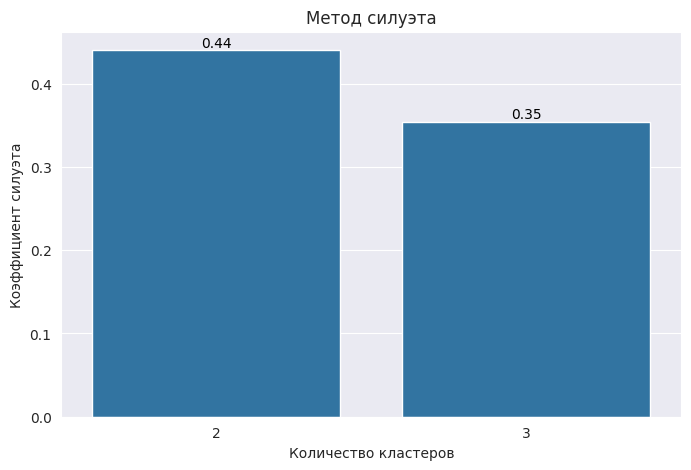

In [187]:
kmeans = KMeansEstimator()
kmeans.choose_optimal_n_clusters([2, 3], cluster_matrix, method='silhouette')

In [188]:
kmeans = KMeansEstimator(n_clusters=3)
kmeans.fit_predict(cluster_matrix.drop(columns=['user_id']))

array([0, 2, 0, 1], dtype=int32)

In [189]:
kmeans.labels_

array([0, 2, 0, 1], dtype=int32)

In [200]:
cl._inverse_transform(kmeans.describe_by_centroids(cluster_matrix))

,A,B,C,amount_of_sessions,min_duration,max_duration,mean_duration,median_duration,min_gap,max_gap,mean_gap,median_gap,min_amount_of_steps,max_amount_of_steps,mean_amount_of_steps,median_amount_of_steps,lifetime,amount_of_active_days
0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,2.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,2.5,2.5,1.0,1.0,1.0,1.0,5.0,1.0


C:\Users\razue\AppData\Local\Temp\ipykernel_1316\1256284340.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


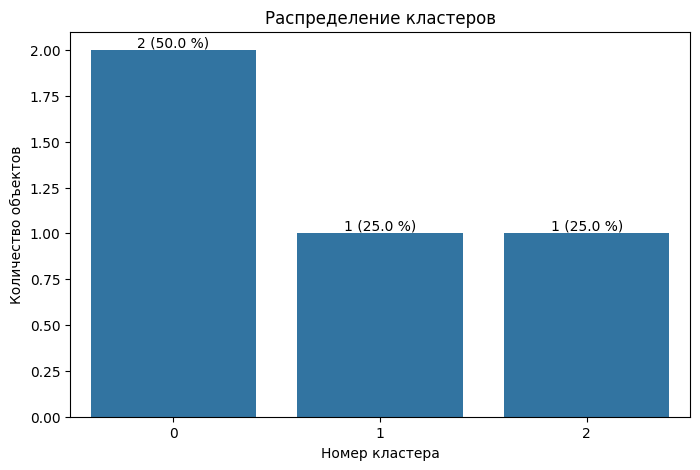

In [201]:
kmeans.plot_clusters_counts()

In [203]:
dbscan = DBScanEstimator()

In [204]:
dbscan.fit_predict(cluster_matrix.drop(columns=['user_id']))

array([-1, -1, -1, -1])

In [205]:
dbscan.labels_

array([-1, -1, -1, -1])

## Тестирование 

In [206]:
import datetime

def generate_user_events_data(num_users=1000, num_events=10, num_cities=10, num_os=2, num_rows=5000, seed=42):
    """
    Функция для генерации данных о событиях пользователей.
    """
    # Устанавливаем seed для генератора случайных чисел
    np.random.seed(seed)

    # Создаем список пользователей
    users = ['user' + str(i) for i in range(1, num_users+1)]

    # Создаем список событий
    events = ['event' + str(i) for i in range(1, num_events+1)]

    # Создаем список дат
    dates = [datetime.datetime.now() - datetime.timedelta(days=x) for x in range(180)]

    # Создаем список городов
    cities = ['city' + str(i) for i in range(1, num_cities+1)]

    # Создаем список операционных систем
    os = ['iOS', 'Android']

    # Создаем DataFrame
    df = pd.DataFrame({
        'user_id': np.random.choice(users, num_rows),
        'event': np.random.choice(events, num_rows),
        'event_datetime': np.random.choice(dates, num_rows),
        'city': np.random.choice(cities, num_rows),
        'operation_system': np.random.choice(os, num_rows)
    })

    return df

In [207]:
data = generate_user_events_data(num_rows=5000)
cols_schema = {'user_id': 'user_id', 'event_timestamp': 'event_datetime', 'event_name': 'event'}
ef = EventFrame(data, cols_schema)
ef.to_dataframe().head()

,user_id,event,event_datetime,city,operation_system,event_id,event_type,event_type_index
1357,user1,event2,2024-10-19 14:58:53.095106,city5,Android,1357,raw,2
4234,user1,event6,2024-10-21 14:58:53.095106,city5,Android,4234,raw,2
2760,user1,event2,2024-11-10 14:58:53.095106,city6,iOS,2760,raw,2
4934,user1,event9,2024-11-22 14:58:53.095106,city3,iOS,4934,raw,2
1049,user1,event10,2024-12-20 14:58:53.095106,city1,iOS,1049,raw,2


In [213]:
ef_data = ef.to_dataframe()

In [281]:
cl = ClasteringDataPreprocessor()
cluster_matrix = cl.create_cluster_matrix(ef, preprocess=True, add_path_stats=False, add_session_stats=False)

In [282]:
cl.inverse_transform(cluster_matrix).head()

{'user_id'}


,event1,event10,event2,event3,event4,event5,event6,event7,event8,event9,user_id
0,0.0,1.0,2.0,-0.0,0.0,0.0,3.0,0.0,-0.0,3.0,user1
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,-0.0,0.0,user10
2,1.0,0.0,0.0,-0.0,1.0,0.0,1.0,0.0,-0.0,0.0,user100
3,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,user1000
4,1.0,0.0,1.0,-0.0,0.0,1.0,0.0,0.0,1.0,0.0,user101


In [221]:
ef_data[ef_data['user_id'] == 'user100']['event'].value_counts()

event
event6    1
event4    1
event1    1
Name: count, dtype: int64

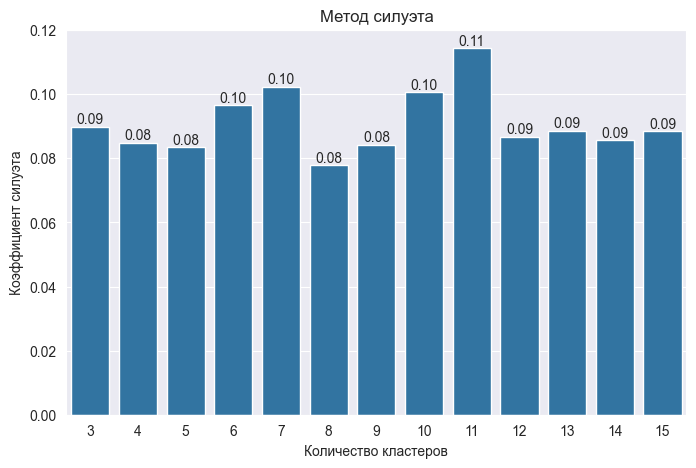

In [283]:
kmeans = KMeansEstimator()
kmeans.choose_optimal_n_clusters([3, 15], cluster_matrix.drop(columns=['user_id']), method='silhouette')

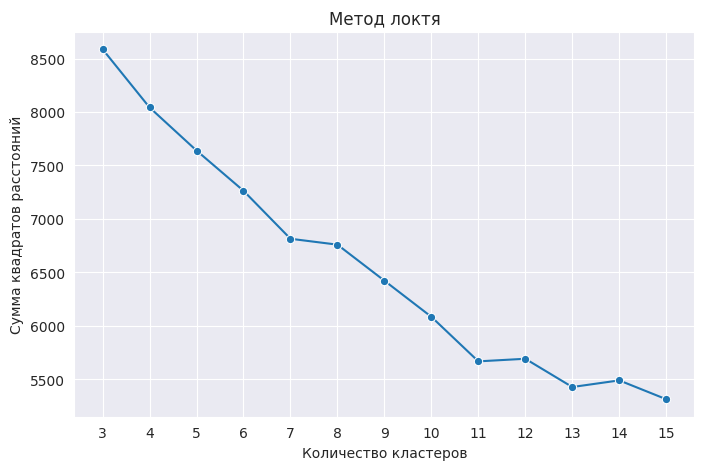

In [244]:
kmeans.choose_optimal_n_clusters([3, 15], cluster_matrix.drop(columns=['user_id']), method='elbow')

In [284]:
kmeans.set_n_clusters(11)

In [285]:
kmeans.fit(cluster_matrix.drop(columns=['user_id']))

KMeans(max_iter=1000, n_clusters=11)

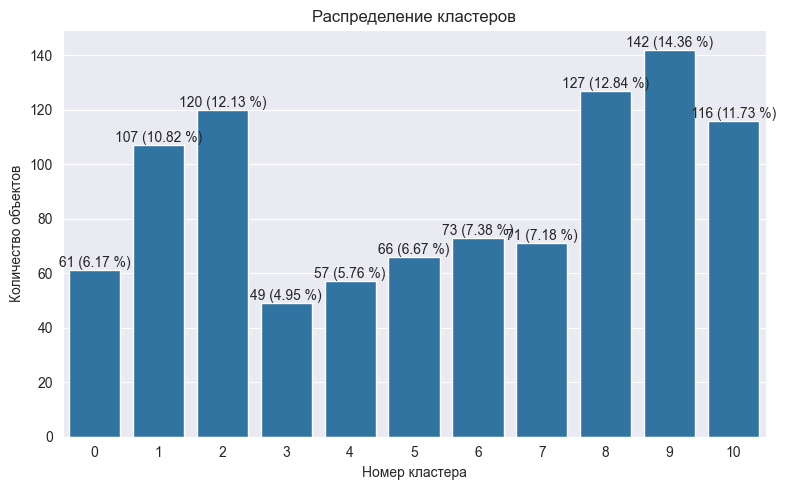

In [286]:
kmeans.plot_clusters_counts()

In [287]:
cl.inverse_transform(kmeans.describe_by_centroids(cluster_matrix.drop(columns=['user_id'])))

set()


,event1,event10,event2,event3,event4,event5,event6,event7,event8,event9,cluster
0,0.393443,0.459016,0.426230,2.229508,0.606557,0.245902,0.295082,0.426230,0.442623,0.344262,0
1,0.401869,1.822430,0.392523,0.411215,0.355140,0.887850,0.476636,0.252336,0.457944,0.411215,1
2,0.166667,0.291667,0.375000,0.325000,0.316667,0.350000,0.275000,0.400000,1.500000,0.250000,2
3,2.367347,0.673469,0.591837,0.591837,0.469388,0.897959,0.734694,0.265306,0.489796,0.387755,3
4,0.526316,0.561404,2.438596,0.473684,0.526316,0.385965,0.456140,0.456140,0.385965,0.298246,4
5,0.303030,0.454545,0.469697,0.333333,0.257576,0.227273,2.378788,0.651515,0.666667,0.439394,5
6,0.506849,0.479452,0.465753,0.424658,0.397260,0.493151,0.602740,0.493151,0.397260,2.150685,6
7,0.281690,0.394366,0.478873,0.338028,2.309859,0.450704,0.464789,0.676056,0.549296,0.323944,7
8,0.409449,0.488189,0.354331,0.370079,0.299213,1.062992,0.354331,1.488189,0.267717,0.417323,8
9,-0.000000,0.239437,0.366197,0.316901,0.316901,0.169014,0.345070,0.338028,0.000000,0.408451,9


In [288]:
ase = AddStartEndEventsPreprocessor()
ef = ase.apply(ef)

ss = SplitSessionsPreprocessor(timeout=(1, 'm'))
ef = ss.apply(ef)

In [289]:
cl = ClasteringDataPreprocessor()
cluster_matrix = cl.create_cluster_matrix(ef, preprocess=True, add_path_stats=True, add_session_stats=True)

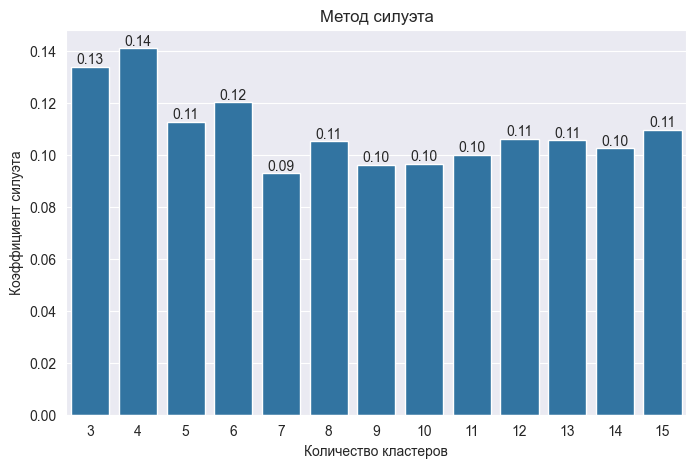

In [290]:
kmeans = KMeansEstimator()
kmeans.choose_optimal_n_clusters([3, 15], cluster_matrix.drop(columns=['user_id']), method='silhouette')

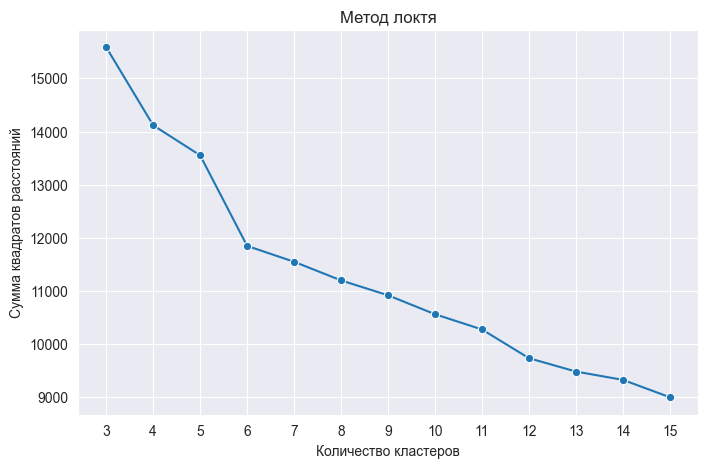

In [291]:
kmeans.choose_optimal_n_clusters([3, 15], cluster_matrix.drop(columns=['user_id']), method='elbow')

In [ ]:
kmeans.set_n_clusters(12)

In [293]:
kmeans.fit(cluster_matrix.drop(columns=['user_id']))

KMeans(max_iter=1000, n_clusters=12)

In [295]:
cl.inverse_transform(kmeans.describe_by_centroids(cluster_matrix.drop(columns=['user_id'])))

set()


,event1,event10,event2,event3,event4,event5,event6,event7,event8,event9,...,max_gap,mean_gap,median_gap,min_amount_of_steps,max_amount_of_steps,mean_amount_of_steps,median_amount_of_steps,lifetime,amount_of_active_days,cluster
0,0.327103,0.485981,0.542056,0.467290,0.457944,0.271028,1.579439,0.785047,0.448598,1.364486,...,76575.700935,28612.117975,20967.476636,1.0,1.000000,1.000000,1.0,186311.775701,6.728972,0
1,0.274074,0.400000,0.251852,0.237037,0.222222,0.311111,0.392593,0.355556,0.274074,0.377778,...,116245.333333,58552.177778,60000.000000,1.0,1.000000,1.000000,1.0,175637.333333,3.096296,1
2,0.172414,0.160920,0.149425,0.114943,0.206897,0.149425,0.195402,0.206897,0.218391,0.229885,...,12198.620690,5857.103448,5478.620690,1.0,1.000000,1.000000,1.0,14002.758621,1.804598,2
3,0.555556,0.290598,0.683761,0.555556,0.333333,0.350427,0.282051,0.444444,0.427350,0.358974,...,135507.692308,47084.717949,23033.846154,1.0,1.000000,1.000000,1.0,196073.846154,4.282051,3
4,1.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,2.0,2.000000,2.000000,2.0,0.000000,1.000000,4
5,0.406897,0.241379,0.372414,0.282759,0.275862,0.475862,0.386207,0.400000,0.255172,0.317241,...,62615.172414,28768.882759,26143.448276,1.0,1.000000,1.000000,1.0,95923.862069,3.413793,5
6,0.333333,0.666667,0.333333,0.333333,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,...,33600.000000,16800.000000,16800.000000,1.0,2.000000,1.500000,1.5,33600.000000,2.000000,6
7,1.273504,0.854701,1.051282,0.735043,0.487179,0.931624,0.435897,0.897436,0.299145,0.615385,...,69526.153846,25532.944833,19735.384615,1.0,1.000000,1.000000,1.0,188590.769231,7.581197,7
8,0.360000,0.730000,0.530000,0.600000,0.400000,0.690000,0.600000,0.540000,1.720000,0.330000,...,77976.000000,29072.157922,22017.600000,1.0,1.000000,1.000000,1.0,184276.800000,6.500000,8
9,1.210526,0.947368,0.894737,0.526316,0.894737,1.131579,1.078947,0.815789,1.026316,0.526316,...,70484.210526,24789.169041,16711.578947,1.0,2.000000,1.132844,1.0,194134.736842,8.026316,9


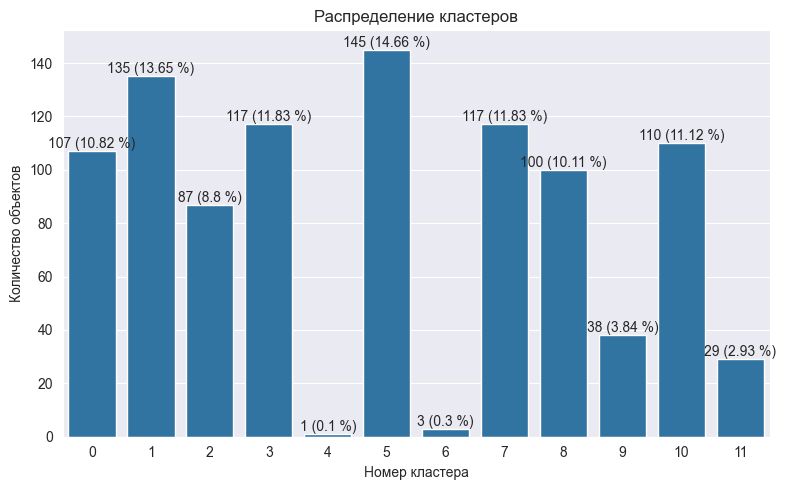

In [296]:
kmeans.plot_clusters_counts()